In [2]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import wilson_action
from modules import utility
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

SU3

In [36]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun3/notwist_joined_more","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun3/twist_joined_more","plaquette:", "real")


## SU4 t=2

Takes about 1 minute to load the data

In [3]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/traj_120000_t2/output-9.5-10.5/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/traj_120000_t2/output-9.5-10.5/output_twist_1","plaquette:", "real")
plaquette_data_twist_2 = read_and_write.load_from_folder("./output_sun4/traj_120000_t2/output-9.5-10.5/output_twist_2","plaquette:", "real")

## SU4 t=4

Takes about 1 minute to load the data

In [96]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/traj_120000_t4/output-joined/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/traj_120000_t4/output-joined/output_twist_1","plaquette:", "real")
plaquette_data_twist_2 = read_and_write.load_from_folder("./output_sun4/traj_120000_t4/output-joined/output_twist_2","plaquette:", "real")

# SU4 t=6 24,24,36,6

In [123]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/traj_120000_t6/su4_phase_transition/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/traj_120000_t6/su4_phase_transition/output_twist_1","plaquette:", "real")
plaquette_data_twist_2 = read_and_write.load_from_folder("./output_sun4/traj_120000_t6/su4_phase_transition/output_twist_2","plaquette:", "real")

# SU4 t=6 DIM 32,32,48,6

In [3]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/traj_12000_3030486/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/traj_12000_3030486/output_twist_1","plaquette:", "real")
plaquette_data_twist_2 = read_and_write.load_from_folder("./output_sun4/traj_12000_3030486/output_twist_1","plaquette:", "real")

# SU4 t=6 DIM 18,18,28,6

In [ ]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/traj_12000_1818286/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/traj_12000_1818286/output_twist_1","plaquette:", "real")

# SU4 t=6 DIM 32, 32, 48 autocorrelation time 

In [1]:
plaquette_data_twist_0 = read_and_write.load_from_folder("./output_sun4/correlation_time/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("./output_sun4/correlation_time/output_twist_1","plaquette:", "real")

NameError: name 'read_and_write' is not defined

In [12]:
plaquette_data_0 = utility.sort_plaquette_dict(plaquette_data_twist_0)
plaquette_data_1 = utility.sort_plaquette_dict(plaquette_data_twist_1)
plaquette_data_2 = utility.sort_plaquette_dict(plaquette_data_twist_2)
plaquette_data_0 = utility.select_subset(plaquette_data_0, 0,22)
plaquette_data_1 = utility.select_subset(plaquette_data_1, 0,22)
plaquette_data_2 = utility.select_subset(plaquette_data_2, 0,22)


# Computing average wilson action dependent on temperature $\beta$

$< S > = \beta \sum_{dir_1 < dir_2} \sum_{X} \frac{1}{N} \Re Tr[1 - U_{dir_1,dir_2}(X)] \approx N*6\frac{1}{N} \Re Tr[1 - U_{dir_1,dir_2}(X)]$

In [13]:
wilson_action.create_average_action_figure(plaquette_data_0,"notwist",plaquette_data_1,"twist")

In [42]:
wilson_action.create_z_index_heat_map(plaquette_data_1,mean=False,series_range=(20000,30000))

KeyboardInterrupt: 

In [ ]:
wilson_action.create_z_index_heat_map(plaquette_data_0,mean=True)

In [ ]:
errors_twist = utility.compute_with_aa(plaquette_data_twist)
errors_notwist = utility.compute_with_aa(plaquette_data_notwist)

sum_errors_twist = {}
sum_errors_notwist = {}

for key,value in errors_twist.items():
    sum_errors_twist[key] = errors_twist[key]["error"].iloc[-1]

for key,value in errors_notwist.items():
    sum_errors_notwist[key] = errors_notwist[key]["error"].iloc[-1]

In [ ]:
wilson_action.create_average_action_figure(plaquette_data_notwist,"notwist",plaquette_data_twist,"twist",errors_notwist, errors_twist)

# Jackknife method

- su4 t2 takes around 3 minutes

In [ ]:
jackknife_0 = utility.compute_with_aa_jackknife(plaquette_data_0,column=37,bins=20)
jackknife_1 = utility.compute_with_aa_jackknife(plaquette_data_1,column=37,bins=20)
jackknife_2 = utility.compute_with_aa_jackknife(plaquette_data_2,column=37,bins=20)


In [ ]:
jackknife_func_0 = utility.construct_jackknife_functions(jackknife_0)
jackknife_func_1 = utility.construct_jackknife_functions(jackknife_1)
jackknife_func_2 = utility.construct_jackknife_functions(jackknife_2)

In [ ]:
wilson_action.create_average_action_figure_jackknife(jackknife_func_0,"notwist",jackknife_func_1,"twist",plot_fmt="-o",fig_text="Twist coefficients 0 and 1. N=20 Jackknife bins")

In [ ]:
wilson_action.create_twist_notwist_difference_figure_jackknife(jackknife_func_0,jackknife_func_1,plot_fmt="-",fig_text="Twist coefficients 0 and 1. N=20 Jackknife bins")

In [ ]:
wilson_action.create_integral_figure_jackknife(jackknife_func_0,jackknife_func_1,N=20,plot_fmt="-",fig_text="Twist coefficients 0 and 1. N=20 Jackknife bins")

In [ ]:
wilson_action.create_integral_figure_jackknife(jackknife_func_0,jackknife_func_1,False)

# FS reweighting

In [ ]:
len(plaquette_data_twist)

In [20]:
reweight_0 = utility.compute_with_fsh_jackknife(plaquette_data_0,
                                   column="sum",
                                   bins=10,
                                   system_size="#1*32^2*48*6*6",
                                   min_b = 10.7,
                                   max_b=10.9,
                                   acc=0.001)

Runnin fsh
Packing data


In [21]:
reweight_1 = utility.compute_with_fsh_jackknife(plaquette_data_1,
                                   column="sum",
                                   bins=10,
                                   system_size="#1*32^2*48*6*6",
                                   min_b = 10.7,
                                   max_b=10.9,
                                   acc=0.001)

Runnin fsh
Packing data


In [ ]:
reweight_2 = utility.compute_with_fsh_jackknife(plaquette_data_2,
                                   column="sum",
                                   bins=10,
                                   system_size="#1*32^2*48*6*6",
                                   min_b = 10.75,
                                   max_b=10.85,
                                   acc=0.001)

In [ ]:
import numpy as np
print(reweight_0[1])

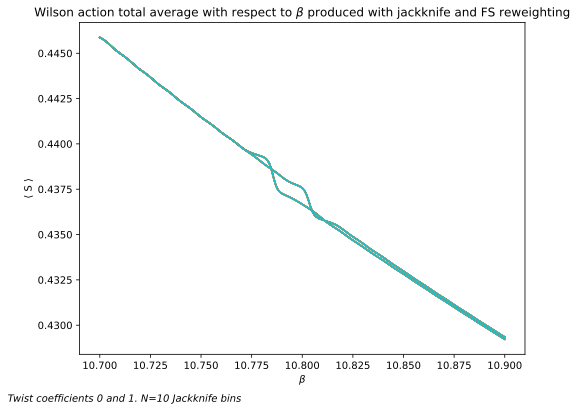

In [22]:
wilson_action.create_average_action_figure_jackknife(reweight_0,"notwist",reweight_1,"twist",FS=True,fig_text="Twist coefficients 0 and 1. N=10 Jackknife bins")

In [23]:
wilson_action.create_twist_notwist_difference_figure_jackknife(reweight_0,reweight_1,FS=True,fig_text="Twist coefficients 0 and 1. N=10 Jackknife bins")

In [ ]:
wilson_action.create_integral_figure_jackknife(reweight_0,reweight_1,N=10,FS=True,fig_text="Twist coefficients 0 and 1. N=10 Jackknife bins")

# Amplitude changes

$\bar{S}(\beta) = S_{t=2}(\beta) - S_{t=1}(\beta)$

$\mathcal{A} = \max(\overline{S}(\beta))$

$A = |\min(\overline{S}'(\beta))-\max(\overline{S}'(\beta))$

For system size $32,32,48,6$: $\mathcal{A} = 0.16392535755242216$ and $A= 0.014999999999998792$



In [ ]:
wilson_action.create_amplitude_graph(reweight_0,reweight_1,extra=0)

N_t = 6
N_x = 32
N_y = 32
N_z = 48

(0.014999999999998792, 0.1609829529899296, 10.787, 10.802)

# Autocorrelation

In [120]:
print(pd.DataFrame.from_dict(utility.compute_with_aa_autocorrelation(plaquette_data_0,thermalization=0),orient='index'))
wilson_action.plot_action_series(plaquette_data_0,cols=1,series_range=(30000,40000))

                0      1
10.2222 0   6.669  0.250
10.2778 0   7.883  0.320
10.3333 0   9.386  0.410
10.3889 0  10.780  0.500
10.4444 0   9.684  0.430
10.5 0      3.899  0.110
10.5556 0   2.251  0.049
10.6111 0   1.936  0.040


In [121]:
print(pd.DataFrame.from_dict(utility.compute_with_aa_autocorrelation(plaquette_data_1,thermalization=0),orient='index'))
wilson_action.plot_action_series(plaquette_data_1,cols=1,series_range=(30000,40000))

                0      1
10.2222 1   6.766  0.250
10.2778 1   7.491  0.290
10.3333 1   9.390  0.410
10.3889 1  10.380  0.480
10.4444 1   9.790  0.440
10.5 1      9.122  0.390
10.5556 1   2.572  0.060
10.6111 1   2.049  0.043


                0      1
10.2222 2   6.590  0.240
10.2778 2   7.427  0.290
10.3333 2   9.126  0.390
10.3889 2  10.940  0.520
10.4444 2   8.948  0.380
10.5 2     11.630  0.560
10.5556 2   2.767  0.067
10.6111 2   2.096  0.044


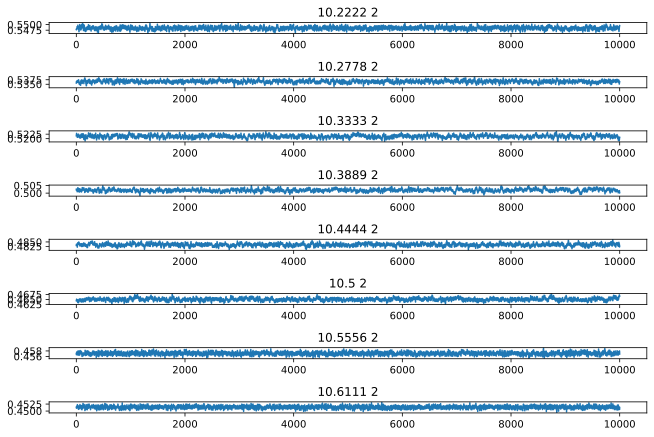

In [122]:
print(pd.DataFrame.from_dict(utility.compute_with_aa_autocorrelation(plaquette_data_2,thermalization=0),orient='index'))
wilson_action.plot_action_series(plaquette_data_2,cols=1,series_range=(30000,40000))

$<S>*N*6/(X*Y)$